### Import Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
salary_df = pd.read_csv('../datasets/salaries/Employee_Salary.csv')

In [3]:
salary_df.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [4]:
salary_df.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [5]:
salary_df.shape

(2000, 2)

### Explore data

In [6]:
salary_df.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [7]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Years of Experience    2000 non-null float64
Salary                 2000 non-null float64
dtypes: float64(2)
memory usage: 31.3 KB


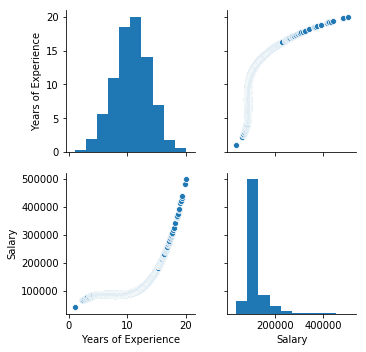

In [8]:
sns.pairplot(salary_df)

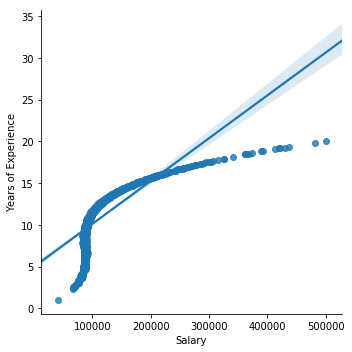

In [9]:
# See how straight line would fit. Example (linear regression). 
sns.lmplot(x = 'Salary', y = 'Years of Experience', data = salary_df)

### Data Prep & Clean

In [10]:
X = salary_df[['Years of Experience']]
y = salary_df['Salary']

In [11]:
print(X.shape)
print(y.shape)

(2000, 1)
(2000,)


In [12]:
print(X.head())
print(y.head())

   Years of Experience
0             1.000000
1             2.257942
2             2.450875
3             2.498713
4             2.613729
0    40000.00000
1    65979.42119
2    67253.57549
3    67342.43510
4    70532.20448
Name: Salary, dtype: float64


In [13]:
# Create train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 5)

### Train & Evaluate Model (Simple linear regresson)

In [14]:
# try with Linear regression
from sklearn.linear_model import LinearRegression
# fit_intercept true = assume b value
reg = LinearRegression(fit_intercept=True)

In [15]:
# Train Model
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('Linear Model Coefficient (m)', reg.coef_)


Linear Model Coefficient (m) [ 11346.18044107]


In [17]:
y_pred = reg.predict(X_test)

In [18]:
y_pred

array([  44133.0573701 ,  126013.331895  ,  134441.28856897,
        131541.54659518,   84414.41876831,   74911.09404277,
         65961.84751288,  166229.54147146,  126849.12376944,
        154306.64125935,   85140.07947557,   62356.07497208,
        161613.10741998,  133593.04948073,   74725.28768705,
         97412.83094695,  149582.50041311,   89562.20798584,
        136567.70007241,   36752.10377314,  140384.68769617,
         95553.40410084,  157553.37881763,  200027.47149416,
        151689.56781352,  150595.33400253,   61836.41429152,
         97859.32932294,   95471.18583101,  116266.80268805,
        125278.08295045,  162997.29468753,  110530.30933044,
        103032.02598212,   88624.10351773,   57645.17387033,
        148734.63767768,   80795.52320117,   95897.33251776,
        109898.73883276,   56874.4179391 ,  132115.9006876 ,
        123890.34807267,  115385.52601853,   70093.49259784,
         88289.85580946,  132066.2019211 ,  125364.16471953,
        179963.96037199,

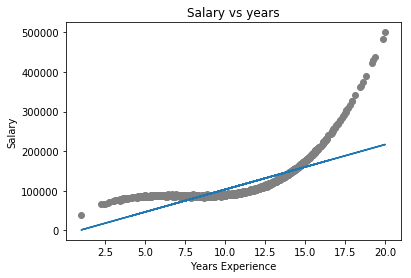

In [19]:
# plot training data points
plt.scatter(X_train, y_train, color='gray')
# Plot model
plt.plot(X_train, reg.predict(X_train))
# Add labels
plt.ylabel('Salary')
plt.xlabel('Years Experience')
plt.title('Salary vs years')

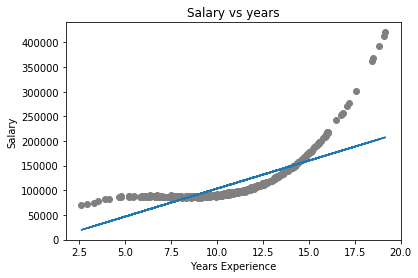

In [20]:
# plot testing data points
plt.scatter(X_test, y_test, color='gray')
# Plot model
plt.plot(X_test, y_pred)
# Add labels
plt.ylabel('Salary')
plt.xlabel('Years Experience')
plt.title('Salary vs years')

In [21]:
# Predict new salary
years = [[17]]
sal = reg.predict(years)

In [22]:
print(sal)

[ 182874.12358559]


In [23]:
# Print accuracy
reg.score(X_test, y_test)

0.60840031990666388

Simple linear regression will not perform well on this data, as you cannot fit a straight line thru it. 

### Poly Regression Model 

In [115]:
# Note that we used the entire dataset for training only 
X_train = X
y_train = y

In [116]:
X_train.shape

(2000, 1)

In [117]:
y_train.shape

(2000,)

In [118]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)
# import a class and instantiate an object from that class 

In [119]:
# # Create train Test Split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01, random_state = 5)

In [120]:
# Transform the matrix of features X into a multi array of features X_Columns 
# which contains the original features and their associated polynomial terms 
X_columns = poly_regressor.fit_transform(X_train)

In [121]:
X_train.shape

(2000, 1)

In [122]:
y_train.shape

(2000,)

In [123]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
print('Model Coefficients: ', regressor.coef_)

Model Coefficients:  [     0.         -33106.32895617   2095.78613853]


In [125]:
X_train.shape

(2000, 1)

In [126]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

In [127]:
y_predict.shape

(2000,)

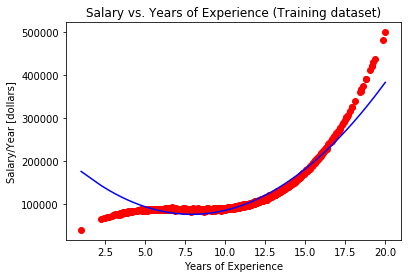

In [128]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color = 'blue')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience (Training dataset)')